<a href="https://colab.research.google.com/github/DianaTorres-4/Inteligencia-Artificial/blob/main/Redes_Neuronales/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNN

In [ ]:
import pandas as pd #utlizaremos la libreria de pandas que se encargara de limpiar y preparar el conjunto de datos

df = pd.read_csv(
    "/content/drive/MyDrive/household_power_consumption.txt.zip", # copemos la ruta de acceso de drive y el doc. es en.zip que es un archivo comprimido
    sep=';',

    parse_dates={'dt': ['Date', 'Time']}, # pedimos que se combinen las columnas date y time del csv y nos muestre una sola
                                          # columna de de fechas y horas y le pondra a esa columna el nombre DT
    infer_datetime_format=True,
    low_memory=False, # evta el procesamiento es decir que no se lea completo el archivo y ayuda a que se manejen mejor los datos
    na_values=['?'] # si algun dato tiene ? se trata d un valor nulo o faltante
)
df.set_index('dt', inplace=True) # le dice que nos muestre la modificacion de la combinacion de columnas que hicimos
df = df.sort_index(ascending=True) # ordena los datos del mas pasado al mas reciente
df.head() # muestra los primeros 5 datos para ver si cargaron correctamente

/tmp/ipython-input-2291564873.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
/tmp/ipython-input-2291564873.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
/tmp/ipython-input-2291564873.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
FEATURES = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
# se define la variable features que contiene una lista de las columnas que exactamente son relevantes
# para el analisis

df = df[FEATURES]
print(df.head()) # imprimimos las 4 variables mas relevantes

                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  
dt                                     
2006-12-16 17:24:00              18.4  
2006-12-16 17:25:00              23.0  
2006-12-16 17:26:00              23.0  
2006-12-16 17:27:00              23.0  
2006-12-16 17:28:00              15.8  


In [ ]:
df.dropna(inplace=True) # elimina las filas o columnas que tengan el simbolo ?que aparecieron en el doc
                        # se limpia la columna dt  ya que asi lo prepara los datos para su uso en el modelo

data_values = df.values # extrae todos los datos y los devuleve como una matriz
print(f" {data_values.shape}") #nos muestra la cantidad de filas y columnas que contiene la matriz

 (2049280, 4)


In [ ]:
from sklearn.preprocessing import MinMaxScaler # importamos la clase minmaxscaleresto normaliza los datos usando arrays numericos
import numpy as np

df_resampled = df.resample('W').mean() #  agrupa el tiempo los minutos en semanas
df_resampled.dropna(inplace=True) # si la semana tiene valores faltantes los elimina

data_values = df_resampled.values # ya que el data frame esta limpio nos lo convierte en una matriz

scaler = MinMaxScaler(feature_range=(0, 1))  #ajusta los valores para que esten en el rango de 0 a 1
scaled_data = scaler.fit_transform(data_values) # calcula los valores minimo y maximo de cada columna y hace la formula para el escalado de datos
                                                # y la matriz con los datos normalizados
print(f" {scaled_data.shape}") # muestra el numero de filas y columnas de la matriz
print(f" {scaled_data.min()} a {scaled_data.max()}") # Confirmar que la operación de escalado ha movido los datos al rango que dimos

 (207, 4)
 0.0 a 1.0000000000000002


In [ ]:
WINDOW_SIZE = 4 #define el tamaño en la secuencia de entrada de los datos en este caso elegimos 4 semanas para intentar predecir la 5ta semana

TARGET_COLUMN = 'Global_active_power'

FEATURES = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# prepara los datos para la prediccion  y utilizamos el target con features para que calcular cual seria el valor del poder activo global

In [ ]:
import numpy as np

def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])

        labels.append(data[i + window_size, 0])

    return np.array(sequences), np.array(labels)

X, y = create_sequences(scaled_data, WINDOW_SIZE)
print(f" {X.shape}")
print(f"{y.shape}")
# es la longitud de cada secuencia de entrada se hacen  dos listas sequences que es para las entradas las X y labels  que son las salidas Y
# hace un bucle que genera los pares de entrada, salida cuando obtenemos la matriz con las secuencias de entrada toma la forma
# de el numero de muestras, window_size de 4 y el numero de caracteristicas que elegimos al inicio tambien 4 esto va en X
# en las salidas Y sera el numero de secuencias osea la prediccion del global_active_power las y son el resultado del modelo es decir lo que aprende a predecir


 (203, 4, 4)
(203,)


In [ ]:
split = int(len(X) * 0.8)

X_train, y_train = X[:split], y[:split]

X_test, y_test = X[split:], y[split:]
print(f"Total de muestras : {len(X)}")
print(f" Entrenamiento: {X_train.shape[0]}")
print(f"Prueba : {X_test.shape[0]}")
# Divison de los datos  len(x) es el  umero de las secuencias que son las x y las multiplica con el.80 osea el 80% de los datos
# y el resultado debe ser entero y se almacena el resultado en split ya que lo tenemos guardados en esa variable ya se pueden usar para entrenar el modelo
# X_test, y_test = X[split:], y[split:] se asegura que estos datos ya puedan evaluar al modelo usando x, y de la variable split


Total de muestras : 203
 Entrenamiento: 162
Prueba : 41


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()

model.add(LSTM(
    units=50,
    return_sequences=False,
    input_shape=(X_train.shape[1], X_train.shape[2])
))


model.add(Dense(units=1))

model.summary()
# usamos una red neuronal recurrente simple con dense que es una capa conectada en este caso usamos 50 neuronas
# si fuera mas grande el numero de neuronas tardaria mucho y tendria un sobreajuste y con el return nos pide que solo devuelva
# la salida final de la secuencia con el simplernn se produce la prediccion es decir la prediccion de global_active_power que sera un valor numerico que predice
# la siguiente semana con model.sumary() se muestran las capas definidas, la salida de cada capa y el numero de parametros que se entrenaron como los pesos


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=16, epochs=100)
#Usaremos adam un optimizador para que ajuste los pesos de las redes neuronales nos da la tasa de aprendizaje del 0.001
# y configura el modelo para el entrenamiento y con optimizer=adam_optimizer usa a adam para que minimice la funcion de la perdida
# e inicia el proceso del entrenamiento ocupa las secuencias de entrada y salida para aprender

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1601
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0288 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss

In [ ]:
predictions = model.predict(X_test)

predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0]

y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]
# genera las predicciones usa model.predict(X_test) hace las predicciones sobre los datos de prueba con los valores en el rango de 0 a 1 con las caracteristicas

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


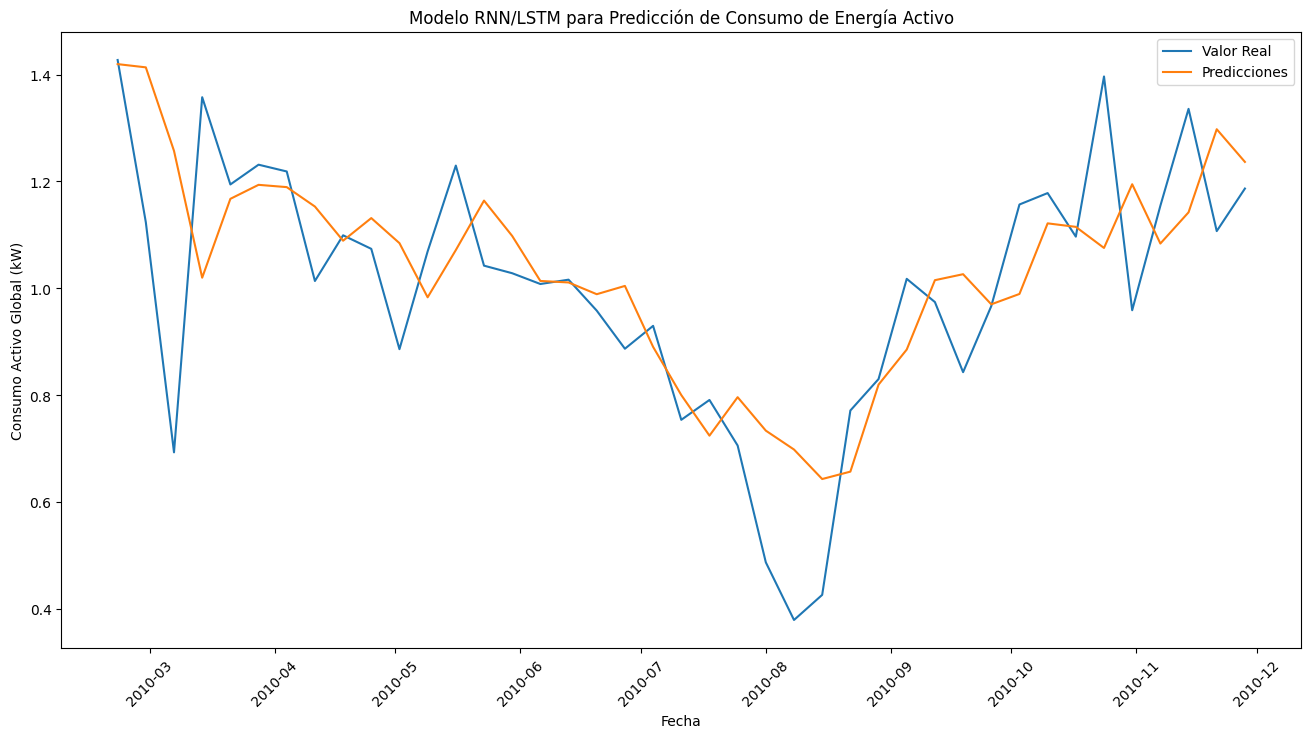

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_valid_full = df_resampled.iloc[split:]

valid = df_valid_full.reset_index()

dates_valid = valid['dt'].tolist()

valid['Valor_Real'] = np.nan
valid['Predictions'] = np.nan

valid.loc[WINDOW_SIZE:, 'Valor_Real'] = y_test_clean
valid.loc[WINDOW_SIZE:, 'Predictions'] = predictions_clean

plt.figure(figsize=(16, 8))
plt.title('Modelo RNN/LSTM para Predicción de Consumo de Energía Activo')
plt.xlabel('Fecha')
plt.ylabel('Consumo Activo Global (kW)')

plt.plot(dates_valid[WINDOW_SIZE:], valid.loc[WINDOW_SIZE:, ['Valor_Real', 'Predictions']])
plt.legend(['Valor Real', 'Predicciones'], loc='upper right')
plt.xticks(rotation=45)
plt.show()
 # nos muestra graficamente la representacion de los datos

In [ ]:
import numpy as np

days = 10
TARGET_INDEX = 0

last_sequence = X[-1].copy()

future_predictions_scaled = []

for _ in range(days):

    input_sequence = np.array([last_sequence])

    next_value_scaled = model.predict(input_sequence)[0, 0]

    next_week_row = last_sequence[-1].copy()

    next_week_row[TARGET_INDEX] = next_value_scaled

    last_sequence = np.vstack((last_sequence[1:], next_week_row))

    future_predictions_scaled.append(next_value_scaled)


future_predictions_scaled = np.array(future_predictions_scaled).reshape(-1, 1)

future_predictions = scaler.inverse_transform(
    np.concatenate((future_predictions_scaled, np.zeros((future_predictions_scaled.shape[0], 3))), axis=1)
)[:, 0]

print(f"Predicciones futuras :  {days} ")
print(future_predictions) # en este caso va predecir 10 semanas hace un bucle que se ejecuta 10 veces una para cada semana


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicciones futuras :  10 
[1.23984753 1.20800958 1.17970029 1.1909192  1.19143624 1.19066421
 1.19055435 1.19069783 1.19068911 1.19068109]


In [ ]:
import pandas as pd

last_date = df_resampled.index[-1]

future_dates_full = pd.date_range(start=last_date, periods=days + 1, freq='W')

future_dates = future_dates_full[1:]

future_dates_list = future_dates.strftime('%Y-%m-%d').tolist() #  prepara los datos para  las predicciones futuras es decir que crea una tipo conexion entre las predicciones de prueba y las futuras hace la conexion entre las lineas nuevas y cupon las futuras


In [ ]:
import pandas as pd

df_future = pd.DataFrame({
    'dt': future_dates_list,
    'Predicciones': future_predictions
})
df_future['dt'] = pd.to_datetime(df_future['dt'])
df_future.set_index('dt', inplace=True)


last_prediction = valid.loc[valid['Predictions'].last_valid_index()]
last_prediction_date = last_prediction['dt']
last_prediction_value = last_prediction['Predictions']

df_connector = pd.DataFrame({
    'dt': [last_prediction_date] + df_future.index.to_list(),
    'Predicciones': [last_prediction_value] + df_future['Predicciones'].to_list()
}).set_index('dt') # crea un nuevo DataFrame llamado df_future usando las fechas futuras
# convierte la columna 'dt' (fecha y tiempo) a un formato de fecha y tiempo de pandas
# establece la columna 'dt' como el índice del DataFrame, lo cual es esencial para el análisis de series de tiempo
#  encuentra la posición de la última predicción histórica que no es nula.
# extrae la fecha y el valor de predicción de esa última entrada Estos serán el punto de partida para la gráfica de las proyecciones futuras.



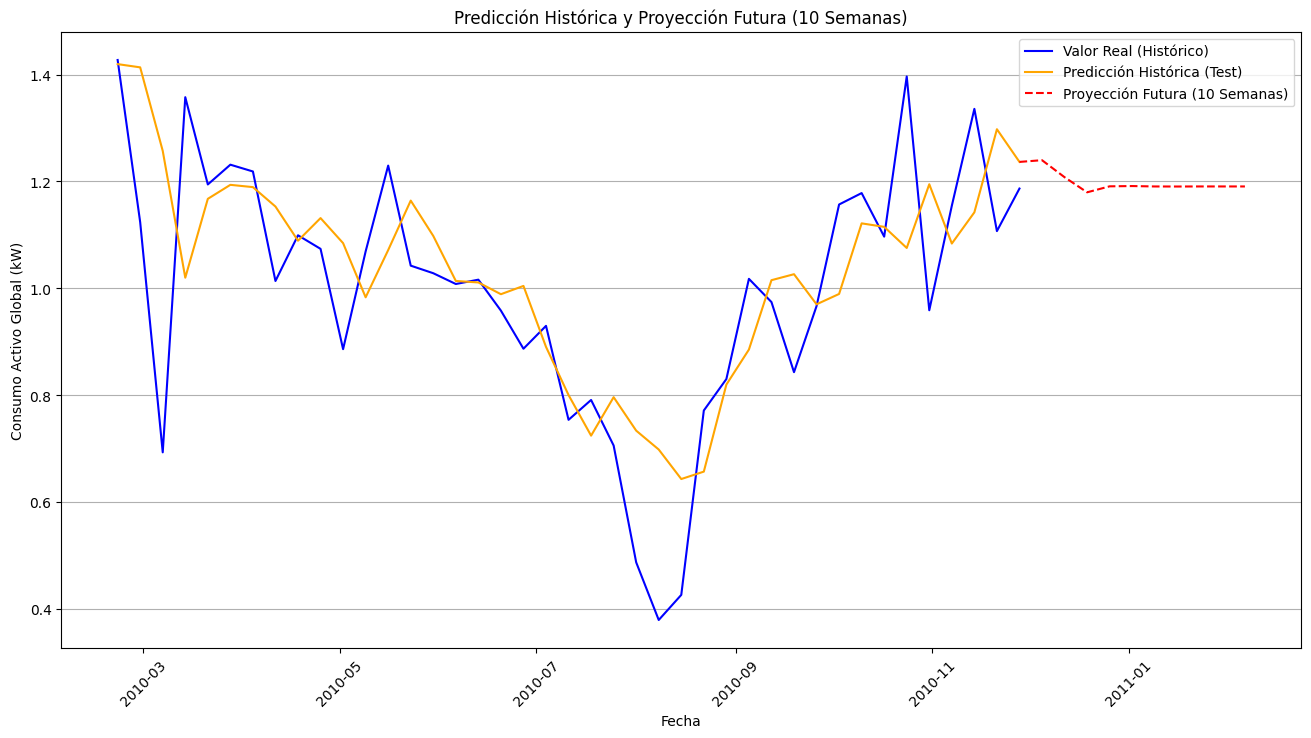

In [ ]:

plt.figure(figsize=(16, 8))
plt.title('Predicción Histórica y Proyección Futura (10 Semanas)')
plt.xlabel('Fecha')
plt.ylabel('Consumo Activo Global (kW)')

plt.plot(valid['dt'][WINDOW_SIZE:], valid['Valor_Real'][WINDOW_SIZE:],
         label='Valor Real (Histórico)', color='blue')

plt.plot(valid['dt'][WINDOW_SIZE:], valid['Predictions'][WINDOW_SIZE:],
         label='Predicción Histórica (Test)', color='orange')

plt.plot(df_connector.index, df_connector['Predicciones'],
         label=f'Proyección Futura ({days} Semanas)', color='red', linestyle='--')

plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()
# representacion grafica de los datos